In [1]:
import urllib.request as ur
import pandas as pd
import numpy as np
import pickle
import json
import ast
import re

from pandas.io.json import json_normalize
from utils import read_config
from pathlib import Path

In [2]:
config = read_config("config.json")
config['dataset_path'] = Path(config['dataset_path'])

In [3]:
videos_df = pd.read_pickle('data/chkp1.pkl')
videos_df.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,description_word_count,channel_title_word_count,description_url_count,description_url_ratio,shouting_ratio_title,shouting_ratio_description,shouting_ratio_channel_title,description_embedding,title_embedding,channel_title_hash
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,2017-11-13 02:05:26+00:00,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,...,177.0,1,16.0,0.090395,0.275862,0.096573,1.000000,"[0.1286950558423996, 0.09136795997619629, -0.0...","[-0.011210336349904537, -0.02326270006597042, ...",-3.408266e+10
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,2017-11-12 18:00:03+00:00,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,...,61.0,2,4.0,0.065574,0.351351,0.070740,0.153846,"[0.08945216238498688, 0.012981911189854145, 0....","[0.046388525515794754, 0.05515308678150177, -0...",-7.891112e+10
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,2017-11-12 21:16:40+00:00,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,...,90.0,2,6.0,0.066667,0.132075,0.160542,0.571429,"[-0.026162145659327507, 0.023051297292113304, ...","[0.010515631176531315, 0.1938595026731491, -0....",-2.124116e+10
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,2017-11-10 19:06:23+00:00,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,...,17.0,4,1.0,0.058824,0.206897,0.031496,0.210526,"[0.12728503346443176, -0.01024122815579176, -0...","[0.036843135952949524, 0.021230153739452362, 0...",3.707550e+11
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,2017-11-10 12:04:17+00:00,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,...,20.0,2,0.0,0.000000,0.037037,0.034091,0.200000,"[0.0592459961771965, -0.07908431440591812, 0.0...","[-0.08078688383102417, 0.07922700047492981, -0...",7.983023e+11


In [4]:
videos_df[videos_df.video_id == '#NAZWA?']

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,description_word_count,channel_title_word_count,description_url_count,description_url_ratio,shouting_ratio_title,shouting_ratio_description,shouting_ratio_channel_title,description_embedding,title_embedding,channel_title_hash


### Download images

In [10]:
# count_unknown = 0
# (config['dataset_path'] / 'images').mkdir(exist_ok=True, parents=True)
# for index, row in videos_df.iterrows():
#     path = config['dataset_path'] / 'images/{}.jpg'.format(row['video_id'])
#     link = re.sub(r'(default)', r'hq\1', row['thumbnail_link'])
#     try:
#         ur.urlretrieve(link, path)
#     except:
#         # Są to filmy, które nie są dostępne (np. są prywatne), przykładem kanału z takim filmem jest The View, który postuje filmy z różnych programów telewizyjnych. Takie filmy mogą być obiektem roszczeń o prawa autorskie, pomimo tego, że były trending i ich thumbnaile będą niedostępne.
#         count_unknown += 1
# count_unknown

804

# Bartek

Model do wykrywania emocji: https://github.com/priya-dwivedi/face_and_emotion_detection/blob/master/emotion_detector_models/model_v6_23.hdf5
https://towardsdatascience.com/face-detection-recognition-and-emotion-detection-in-8-lines-of-code-b2ce32d4d5de


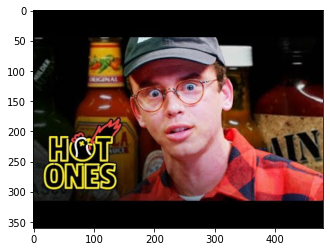

In [5]:
import face_recognition
import matplotlib.pyplot as plt

emotions_to_idx = {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}
idx_to_emotions = {v:k for k,v in emotions_to_idx.items()}

img = face_recognition.load_image_file('data/images/__4c1JCHvaQ.jpg')
plt.imshow(img)

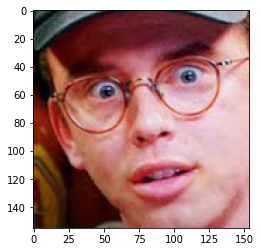

In [6]:
top, right, bottom, left = face_recognition.face_locations(img)[0]
face_image = img[top:bottom, left:right]
plt.imshow(face_image)

In [7]:
from tensorflow.keras.models import load_model

model = load_model('data/model_v6_23.hdf5')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 128)       

Shape (48, 48, 1)


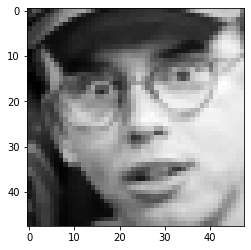

In [8]:
from skimage import transform
from skimage import color
face_image_2 = transform.resize(face_image, (48,48,3))
face_image_3 = color.rgb2gray(face_image_2)[..., np.newaxis]

print('Shape', face_image_3.shape)
plt.imshow(face_image_3, cmap='gray')

In [9]:
print(model.inputs)
emotion_id = np.argmax(model.predict(face_image_3[np.newaxis,...]))
idx_to_emotions[emotion_id]

[<KerasTensor: shape=(None, 48, 48, 1) dtype=float32 (created by layer 'conv2d_54_input')>]


'Surprise'

In [24]:
images_df = videos_df[['video_id', 'category_id']]
images_df.head()

,video_id,category_id
10,9wRQljFNDW8,NaN
36,Om_zGhJLZ5U,NaN
41,goP4Z5wyOlM,NaN
55,8NHA23f7LvU,NaN
76,IE-xepGLVt8,NaN


In [10]:
image_paths = sorted(Path('data/images').glob('*.jpg'), key=lambda p: p.name)

video_ids = [p.name for p in image_paths]
video_ids[:5], image_paths[:5]

images = [face_recognition.load_image_file(str(p)) for p in image_paths]

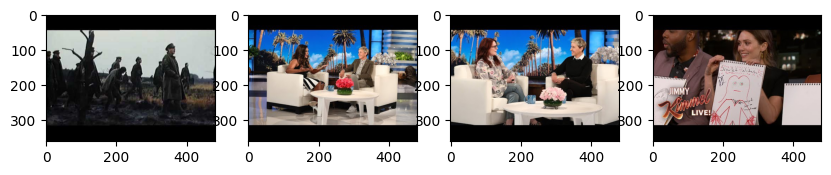

In [11]:
fig, ax = plt.subplots(1,4, figsize=(10,12), dpi=100)

for i in range(4):
    ax[i].imshow(images[i])

plt.show()

In [12]:
images_df = pd.DataFrame(dict(images=images, video_id=video_ids)).set_index('video_id')
images_df.head()

,images
video_id,
--uXQQ0h-yQ.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
-0CMnp02rNY.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
-0NYY8cqdiQ.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
-1Hm41N0dUs.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
-1yT-K3c6YI.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [13]:
cache_dir = Path('data/cache/chkp2')
cache_dir.mkdir(exist_ok=True, parents=True)

images_with_idx = list(zip(video_ids, images))

def process_face(img):
    face_img = transform.resize(img, (48,48,3))
    return color.rgb2gray(face_img)[..., np.newaxis]

def detect_faces(idx, img):
    faces = face_recognition.face_locations(img)
    return idx, [process_face(img[top:bottom, left:right]) for top, right, bottom, left in faces]

def detect_faces_tuple(pair):
    return detect_faces(pair[0], pair[1])

In [14]:
from concurrent.futures import TimeoutError
from pebble import ProcessPool, ProcessExpired
import pickle

def load_pickle(path):
    print("Loading from:", path)
    with open(path, 'rb') as fh:
        return pickle.load(fh)

def save_pickle(obj, path):
    print("Saving to:", path)
    with open(path, 'wb') as fh:
        return pickle.dump(obj, fh)

In [15]:
cpus = 16
size = len(images_with_idx)
chunksize = size // cpus

faces_path = cache_dir / 'faces.pkl'
if faces_path.exists():
    faces = load_pickle(faces_path)
else:
    with ProcessPool() as pool:
        future = pool.map(detect_faces_tuple, images_with_idx, chunksize=chunksize)
        iterator = future.result()
        faces = list(iterator)
        save_pickle(faces, faces_path)


Loading from: data/cache/chkp2/faces.pkl


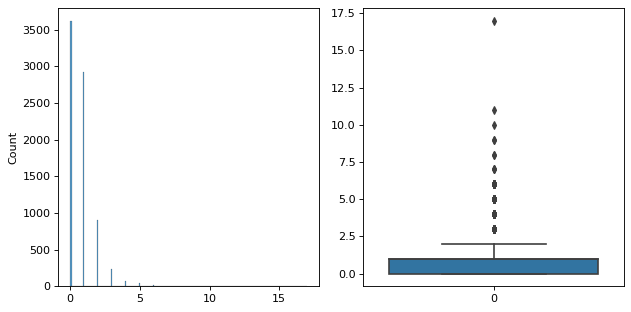

In [16]:
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(8,4), dpi=80) 
sns.histplot(data=[len(f) for _, f in faces], ax=ax[0])
sns.boxplot(data=[len(f) for _, f in faces], ax=ax[1])
fig.tight_layout()

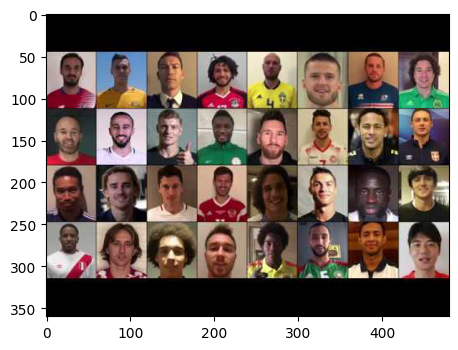

In [17]:
faceful_idx = [idx for idx, f in faces if len(f) > 15]

fig, ax = plt.subplots(dpi=100)
plt.imshow(images_df.loc[faceful_idx,'images'][0])

In [18]:
images_df = images_df.join(pd.Series([len(f) for _, f in faces], index=[idx for idx, _ in faces], name='face_count'))

In [19]:
from tensorflow.keras.models import load_model

model = load_model('data/model_v6_23.hdf5')

In [20]:
unrolled_faces = []
for idx, fs in faces:
    for f in fs:
        unrolled_faces.append((idx, f))

len(unrolled_faces)

6092

In [21]:
predicted_emotions = dict(idx=[], emotion=[])

BATCH_SIZE = 256


def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]


emotions_path = cache_dir / 'emotions.pkl'
if emotions_path.exists():
    predicted_emotions = load_pickle(emotions_path)
else:
    for batch in chunks(unrolled_faces, BATCH_SIZE):
        predictions = model.predict(np.array([b for _, b in batch]))
        predictions = [idx_to_emotions[x] for x in np.argmax(predictions, axis=1)]
        for (idx, _), emotion in zip(batch, predictions):
            predicted_emotions['idx'].append(idx)
            predicted_emotions['emotion'].append(emotion)

    save_pickle(predicted_emotions, emotions_path)

len(predicted_emotions['idx'])

Loading from: data/cache/chkp2/emotions.pkl


6092

/home/hylomorph/Study/ped/yt_trending_videos/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

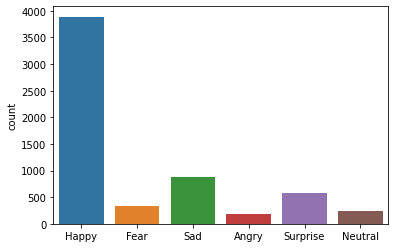

In [22]:
sns.countplot(predicted_emotions['emotion'])

In [23]:
emotions_df = {k: [] for k in images_df.index}
for k, e in zip(predicted_emotions['idx'], predicted_emotions['emotion']):
    emotions_df[k].append(e)


emotion_index = list(emotions_df.keys())
emotions_df = pd.Series([emotions_df[i] for i in emotion_index], index=emotion_index, name='emotions')
images_df = images_df.join(emotions_df)

In [24]:
from collections import Counter

def embbed_emotions(x):
    c = Counter(x)
    return {'count_'+k.lower(): c.get(k, 0) for k in emotions_to_idx.keys()}

images_df = images_df.join(images_df.emotions.map(embbed_emotions).apply(pd.Series))
images_df.head()

,images,face_count,emotions,count_angry,count_sad,count_neutral,count_disgust,count_surprise,count_fear,count_happy
video_id,,,,,,,,,,
--uXQQ0h-yQ.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,[],0,0,0,0,0,0,0
-0CMnp02rNY.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,[],0,0,0,0,0,0,0
-0NYY8cqdiQ.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1,[Happy],0,0,0,0,0,0,1
-1Hm41N0dUs.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1,[Happy],0,0,0,0,0,0,1
-1yT-K3c6YI.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2,"[Fear, Happy]",0,0,0,0,0,1,1
